In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import datetime as dt
from glob import glob
from collections import Counter
import wordcloud


In [5]:

#Loading files into variables
df_list = pd.read_csv("INvideos.csv")
df_list.head()

#reading the json file for categories
with open('IN_category_id.json') as f:
  categories = json.load(f)



In [7]:
#dropping the unnecessary columns thumbnail_links, discription , tags
new_data = df_list.drop(['tags', 'thumbnail_link','description'], axis = 1)



In [8]:
#Extracting values of cateogry id and category from json file

items = categories['items']
category_id = []
category_title = []
for i in range(0,len(items)):
    category_id.append(items[i]['id'])
    category_title.append(items[i]['snippet']['title'])
category_dict = dict(zip(category_id, category_title))
print(category_dict)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [10]:
#mapping the categories into dataframe for analysis

def category_maker(value):
    for key in category_dict:
        if str(value) == key:
            return (category_dict[key])
        else:
            continue

new_data['category'] = new_data.category_id.apply(func=category_maker)
new_data.category = new_data.category.astype('category')
new_data = new_data.drop(columns=['category_id'],axis = 1)



    


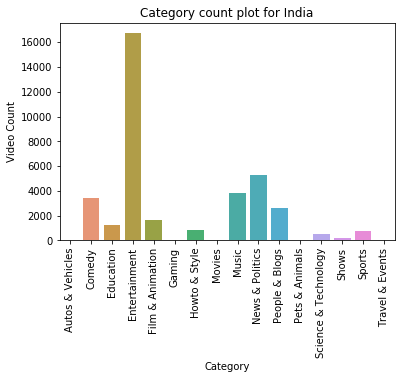

In [11]:
# counting the occurance of any category 
sns.countplot(new_data['category'])
plt.title('Category count plot for India')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=90)
plt.show()

In [12]:

grouped = new_data.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

#print(wanted_groups[0])

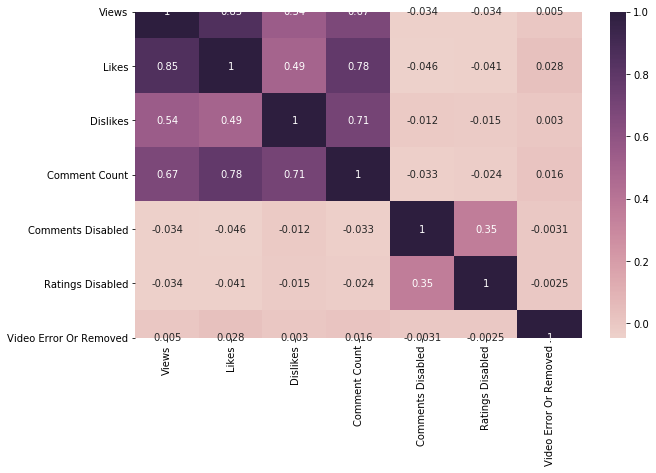

In [13]:
#heat map to dispay the corelation between the given variables, we can see that there is strong coreletion between likes and views, Comment count and likes
h_labels = [x.replace('_', ' ').title() for x in 
            list(new_data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(new_data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

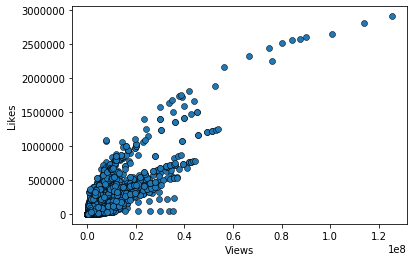

In [14]:
# As we can infer that there is high positive corelation between views and likes from above heat map, lets plot the corelation between the two
fig, ax = plt.subplots()
_ = plt.scatter(x=new_data['views'], y=new_data['likes'],  edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [10]:
new_data.describe()
# we can say that mean views are 1060478 and median views are 304586 ie 
# half of the trending videos have views less than the median 
# average comment count is 2677 and 50% of trending videos have more than 329 comments

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


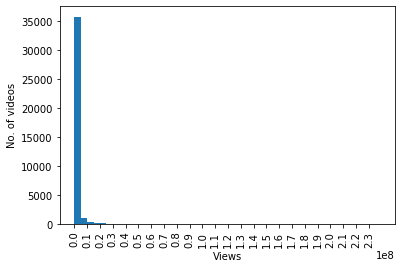

In [11]:
# majority of trending videos have less than 5 million views 0.1*10^8/2
 
fig, ax = plt.subplots()
_ = sns.distplot(new_data["views"], kde=False,  
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)



In [12]:

# we can infer that ~80% of videos have less than 1 million views
new_data[new_data['views'] < 1e6]['views'].count() / new_data['views'].count() * 100


79.56735917755408

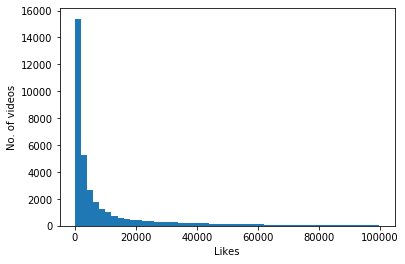

In [13]:
# histogram with videos less than 1 Million likes, majority of likes are less than 40000
fig, ax = plt.subplots()
_ = sns.distplot(new_data[new_data["likes"] <= 1e5]["likes"], kde=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [14]:
# 79.32% of likes are less than 20000
new_data[new_data['likes'] < 2e4]['likes'].count() / new_data['likes'].count() * 100



79.32105375883486

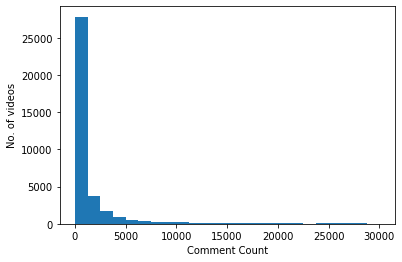

In [15]:
# histogram showing comment count less than 30000, vast majority of comments lie between 5000/4 ie 1250 comments since each divison has 4 bins
fig, ax = plt.subplots()
_ = sns.distplot(new_data[new_data["comment_count"] < 30000]["comment_count"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 3e4, 25), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [16]:
#81.55% of videos have less than 2000 comments
new_data[new_data['comment_count'] < 2000]['comment_count'].count() / new_data['comment_count'].count() * 100


81.55118869136861

In [17]:
title_words = list(new_data["title"].apply(lambda x: x.split('|')))
title_words = [x for y in title_words for x in y]
Common_words = Counter(title_words).most_common(26)
Common_words.pop(0)
Common_words

[(' ETV Telugu', 505),
 (' ETV Plus', 242),
 (' Sun TV ', 233),
 (' Official Trailer ', 183),
 ('FilterCopy ', 168),
 (' Odia Serial - TarangTV', 167),
 (' Full Episode ', 151),
 (' Web Series ', 150),
 (' The Timeliners', 145),
 ('Nandini ', 142),
 (' SunTV', 138),
 (' Black Sheep', 136),
 (' Latest Punjabi Songs 2018 ', 132),
 ('Manasu Mamata ', 128),
 (' Lalit Shokeen Films ', 127),
 (' Latest Punjabi Songs 2018', 123),
 (' Extra Jabardasth ', 119),
 (' Aashqeen', 118),
 (' Samantha ', 118),
 ('Patas ', 115),
 (' Tamil ', 115),
 (' Chai Bisket', 111),
 (' dhaval domadiya', 110),
 (' Salman Khan ', 109),
 (' Flowers ', 109)]

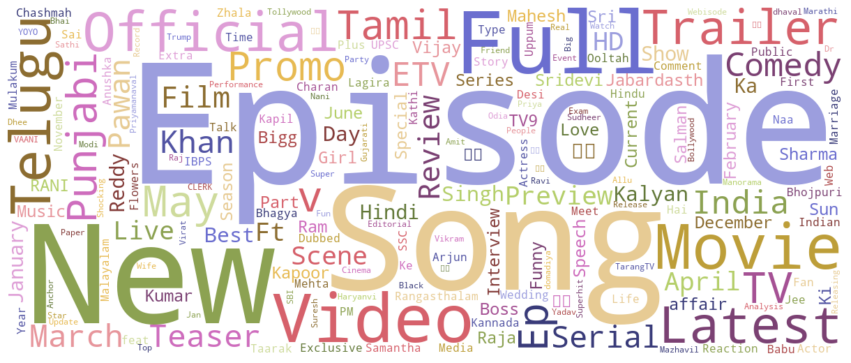

In [18]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")